### D208 Performance Assessment_NBM2_Task_2
   
   ### Multiple Regression for Predictive Modeling
   
  

#### Id No.: 010756950 
#### Mentor: Eric Straw
#### Date: 01/18/2023

## Part I: Research Question

### A1. Research Question:

Which variables are most important to predict which customers are at high risk of churn?

### A2. Objectives and Goals:

Stakeholders in the organization will benefit from an analysis of the data because it gives a clear insight of which customers are at high risk of churn. This will help in better decision making which improve the business performance and also enhance the services to the customers.

## Part II: Method Justification

### B1. Summary of Assumptions:

Logistic regression assumes that the response variable only takes on two possible outcomes. Some examples include:
- Yes or No
- Male or Female
- Pass or Fail 
(Zach. October, 2020. The 6 Assumptions of Logistic Regression.https://www.statology.org/assumptions-of-logistic-regression/) 

Logistic regression assumes that the observations in the dataset are independent of each other. That is, the observations should not come from repeated measurements of the same individual or be related to each other in any way. (Zach. October, 2020. The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/) 

Logistic regression assumes that there is no severe multicollinearity among the explanatory variables. (Zach. October, 2020. The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/) 

Logistic regression assumes that there are no extreme outliers or influential observations in the dataset. (Zach. October, 2020. The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/)

Logistic regression assumes that there exists a linear relationship between each explanatory variable and the logit of the response variable. (Zach. October, 2020. The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/)

Logistic regression assumes that the sample size of the dataset if large enough to draw valid conclusions from the fitted logistic regression model. (Zach. October, 2020. The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/)





### B2. Tool Benefits:

Python will be used to support the various phases of the analysis. Python can handle large dataset easier. It has large libraries that expand its visualization capabilities to do statistical analysis. It also allows the user to implement code solutions, manipulate the data, and create visual representations.

### B3. Appropriate Technique:

Logistic Regression is a statistical technique used for predictive modeling. Logistic Regression is a type of regression analysis, which means that it is used to predict a dependent variable based on one or more independent variables. (https://climbtheladder.com/, Aug,2022).

Logistic regression is the appropriate technique which can be used to predict the likelihood of a customer churn, based on independent variables like children, age, income etc. 

## Part III: Data Preparation

### C1. Data Goals:
My data preparation and data manipulation goals will include:
  - Read the data set into Python using Pandas read_csv command.
  -	Evaluate the data structure to gain a better understanding of the variables and data types.
  - Name the data set as "df_churn".
  - Rename the misleading variables.	
  - Check for the duplicate data using .duplicated() function and check for the null values using isnull() function.
  - Replace the missing values with measures of central tendency (mean, median, mode) using imputation method.
  - Check for the outliers using histogram or boxplot.
  -	Summaries of univariate and bivariate statistics.

### C2. Summary Statistics:

- After the data set is imported into python, read the data set using pandas read_csv command, the output shows that the dateset consists of 50 original columns and 10,000 records.
   - Columns such as User ID, Caseorder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Marial, and PaymentMethod were removed from the dataframe.
   - Binary categorial variables "Yes/No", "Male/Female" were encoded to 1/0.
   - This results in 34 numerical independent variable including target variables.
   - The dependent variable Churn is most relevant in decision making which is binary categorical with only two values, “Yes” or “No”. “Churn” will be the categorical target variable.
   - “Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwidth_GB_Year" is the continuous predictor variables.
   - “Gender, Techie, Contract, Port_modem, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies" is the categorical predictor variables.
   - The discrete ordinal variables (These variables are the survey questions provided using a rating system of 1 to 8 (1 = most important, 8 = least important)
   - Now the dataset appeared to be cleaned leaving no null values or missing data.
   - Boxplot and histogram were created to check for outliers and normal distribution.
   - Histograms for "Bandwidth_GB_Year" & "Tenure" displayed a bimodal distributions, which also showed linear relationship in a scatterplot.
   - The average age of customer is 53 years with standard deviation 20.70, has 2 children with standard deviation 2 and income of 39806.93 dollar with  standard  deviation 28199.92,  10 second per week outage, has less than one yearly equipment failures, and has a monthly charge of 172.53 dollar and uses 3392.34 gigabytes of data per year.

###  C3. Steps to Prepare Data:
- Import dataset to Python dataframe.
- Read dataset using Pandas pd.read_csv command.
- Rename ambiguous variable naming.
- Get a description, structure and data types of the dataframe.
- Identify missing data or NaN and impute the missing data with the appropriate measures of central tendency (mean, median, mode).
- View summary statistics.
- Drop less meaningful columns from dataframe.
- Identify outilers with boxplot and histogram.
- Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
- View univariate & bivariate visualizations.
- Finally, the prepared dataset will be extracted & provided as "log_prepared_churn.csv"

In [1]:
# Standard data science imports
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data set into Pandas dataframe
df_churn = pd.read_csv('churn_clean.csv')

# Rename last 8 survey columns for better description of variables
df_churn.rename(columns = {'Item1':'TimelyResponse',
'Item2':'Fixes',
'Item3':'Replacements',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)

In [3]:
# Display Churn dataframe
df_churn

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
#list column names
df_churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [5]:
#Display the summary of the dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# Display the dimension of dataframe
df_churn.shape

(10000, 50)

In [7]:
#Display descriptive statistics for each column.
df_churn.describe() 

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
#Drop the less meaningful column 'Customer_id','Interaction', 'UID','CaseOrder','Zip','Lat', 'Lng', 'City','State','County','Zip','Population','Area', 'TimeZone', 'Job', 'Marital','PaymentMethod'.

df_churn = df_churn.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City',
                                  'State', 'County', 'Zip', 'Lat', 'Lng','Population','Area', 
                                  'TimeZone', 'Job', 'Marital','PaymentMethod'])


In [9]:
# Display the dimension of dataframe
df_churn.shape

(10000, 34)

In [10]:
#Display descriptive statistics for each column.
df_churn.describe() 

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [11]:
# count the duplicate data
df_churn.duplicated().value_counts()

False    10000
dtype: int64

In [12]:
# Display the number of null values
df_churn.isnull().sum()

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respectfulness          0
Courteous               0
Listening               0
dtype: int64

In [13]:
# Create dummy variables in order to encode categorical, yes/no data points into 1/0 numerical values.
df_churn['DummyGender'] = [1 if v == 'Male' else 0 for v in df_churn['Gender']]
df_churn['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df_churn['Churn']]
df_churn['DummyTechie'] = [1 if v == 'Yes' else 0 for v in df_churn['Techie']]
df_churn['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df_churn['Contract']]
df_churn['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df_churn['Port_modem']]
df_churn['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df_churn['Tablet']]
df_churn['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df_churn['InternetService']]
df_churn['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df_churn['Phone']]
df_churn['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df_churn['Multiple']]
df_churn['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineSecurity']]
df_churn['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df_churn['OnlineBackup']]
df_churn['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df_churn['DeviceProtection']]
df_churn['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df_churn['TechSupport']]
df_churn['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingTV']]
df_churn['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in df_churn['StreamingMovies']]
df_churn['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in df_churn['PaperlessBilling']]

In [14]:
# Drop original categorical features from dataframe
df_churn = df_churn.drop(columns=['Gender', 'Churn', 'Techie', 'Contract','Port_modem', 'Tablet','InternetService', 
                                'Phone', 'Multiple','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport',
                                'StreamingTV', 'StreamingMovies','PaperlessBilling'])

In [15]:
#Display descriptive statistics for each column.
df_churn.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyPaperlessBilling
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.299100,0.440800,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.457887,0.496508,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_churn.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyChurn',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling'],
      dtype='object')

###  C4. Visualizations:

### Univariate Statistics

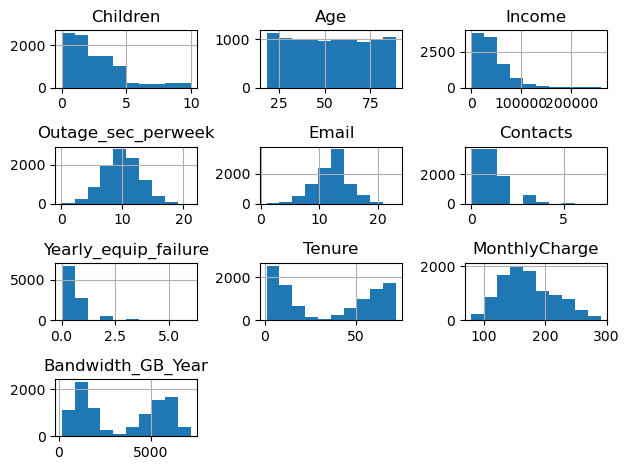

In [17]:
# Create histograms of continuous variables
df_churn[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email','Contacts', 'Yearly_equip_failure', 'Tenure', 
          'MonthlyCharge','Bandwidth_GB_Year']].hist()
plt.tight_layout()

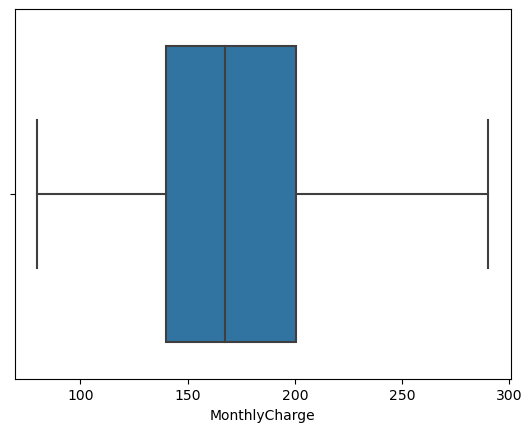

In [18]:
# Display boxplots for continuous variables MonthlyCharge, Bandwidth_GB_Year and Tenure
sns.boxplot('MonthlyCharge', data = df_churn)
plt.show()

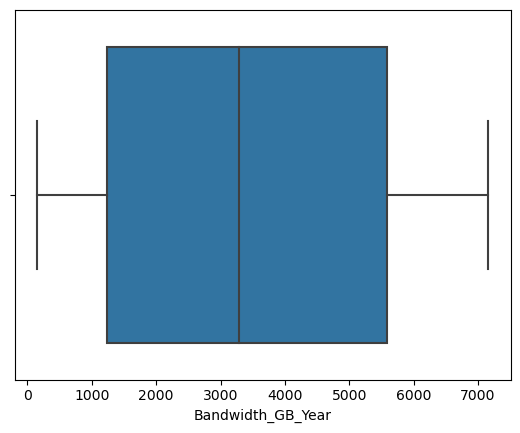

In [19]:
sns.boxplot('Bandwidth_GB_Year', data = df_churn)
plt.show()

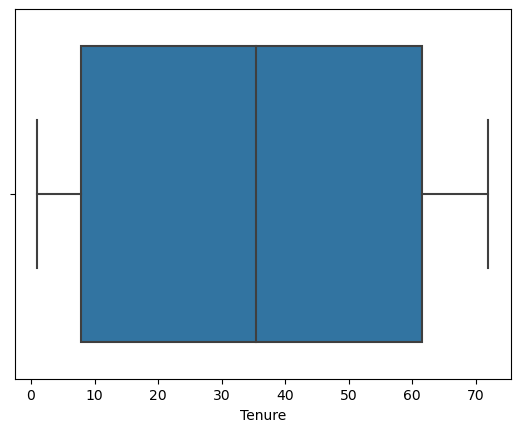

In [20]:
sns.boxplot('Tenure', data = df_churn)
plt.show()

From the above plot it shows that the anomolies has been removed and there is no outliers.

###  Bivariate Statistics

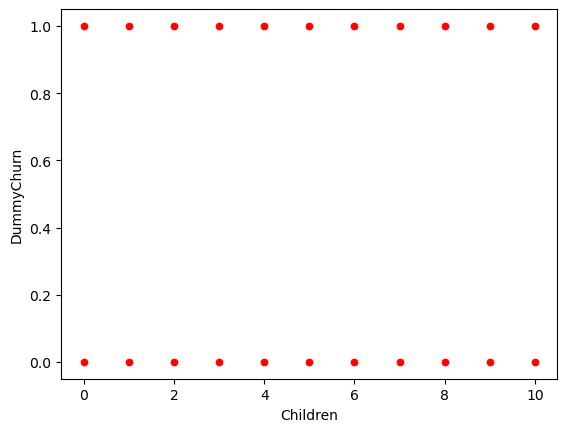

In [21]:
# Display the scatterplot between target & independent variables
sns.scatterplot(x=df_churn['Children'], y=df_churn['DummyChurn'], color='red')
plt.show();

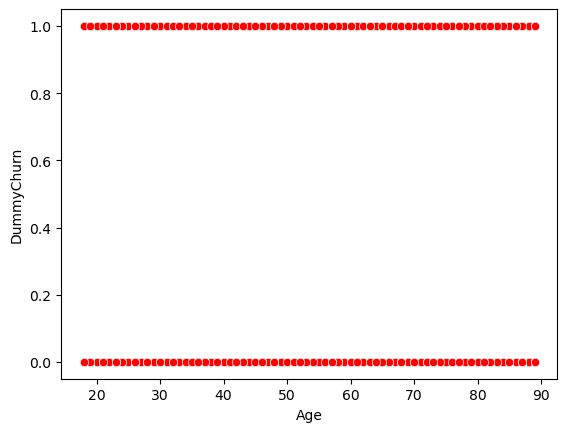

In [22]:
sns.scatterplot(x=df_churn['Age'], y=df_churn['DummyChurn'], color='red')
plt.show();

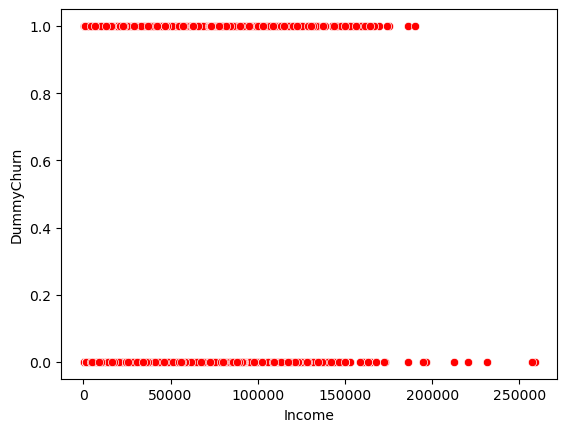

In [23]:
sns.scatterplot(x=df_churn['Income'], y=df_churn['DummyChurn'], color='red')
plt.show();

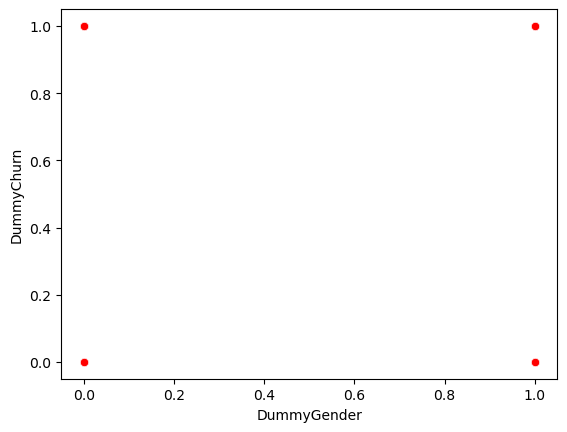

In [24]:
sns.scatterplot(x=df_churn['DummyGender'], y=df_churn['DummyChurn'], color='red')
plt.show();

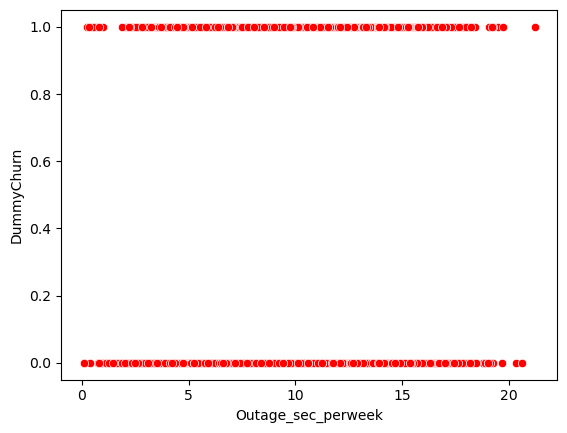

In [25]:
sns.scatterplot(x=df_churn['Outage_sec_perweek'], y=df_churn['DummyChurn'], color='red')
plt.show();

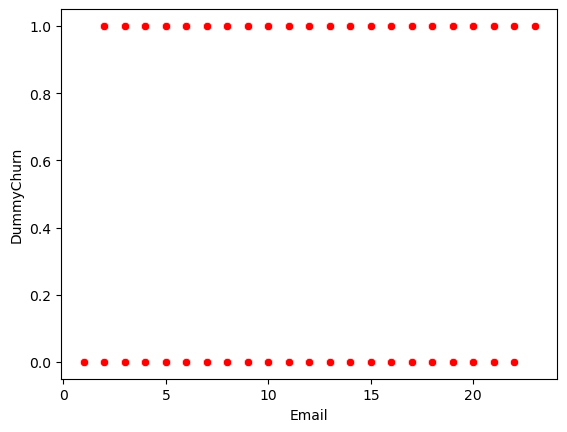

In [26]:
sns.scatterplot(x=df_churn['Email'], y=df_churn['DummyChurn'], color='red')
plt.show();

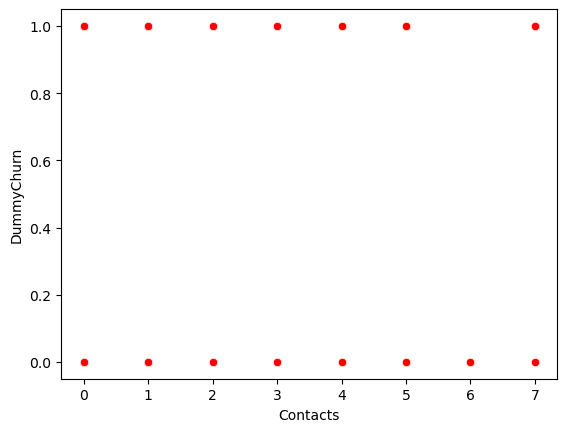

In [27]:
sns.scatterplot(x=df_churn['Contacts'], y=df_churn['DummyChurn'], color='red')
plt.show();

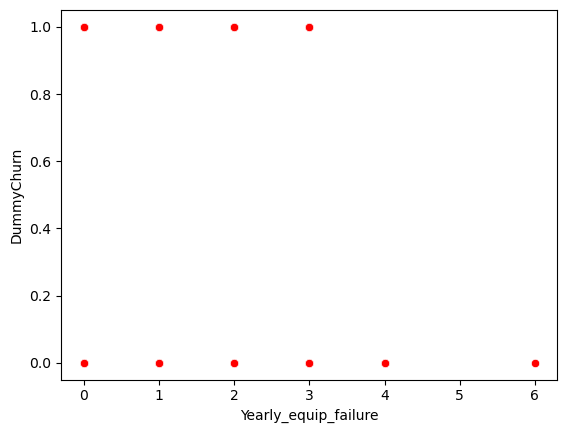

In [28]:
sns.scatterplot(x=df_churn['Yearly_equip_failure'], y=df_churn['DummyChurn'], color='red')
plt.show();

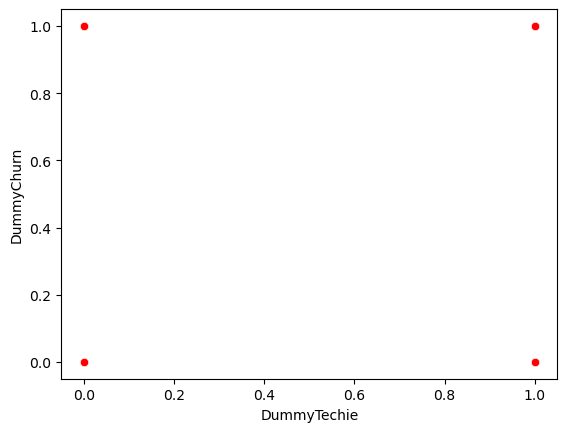

In [29]:
sns.scatterplot(x=df_churn['DummyTechie'], y=df_churn['DummyChurn'], color='red')
plt.show();

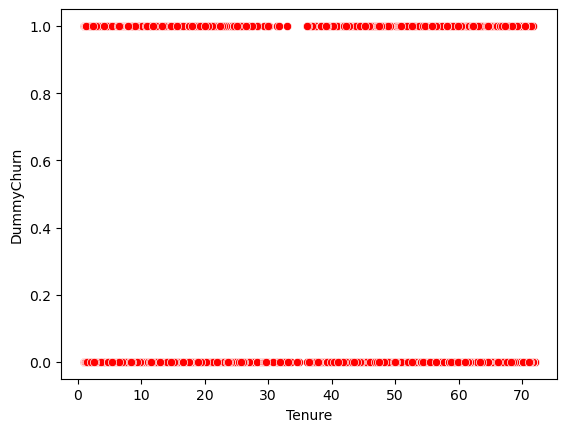

In [30]:
sns.scatterplot(x=df_churn['Tenure'], y=df_churn['DummyChurn'], color='red')
plt.show();

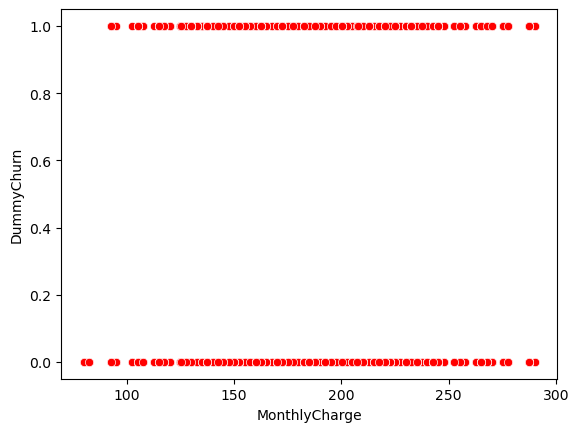

In [31]:
sns.scatterplot(x=df_churn['MonthlyCharge'], y=df_churn['DummyChurn'], color='red')
plt.show();

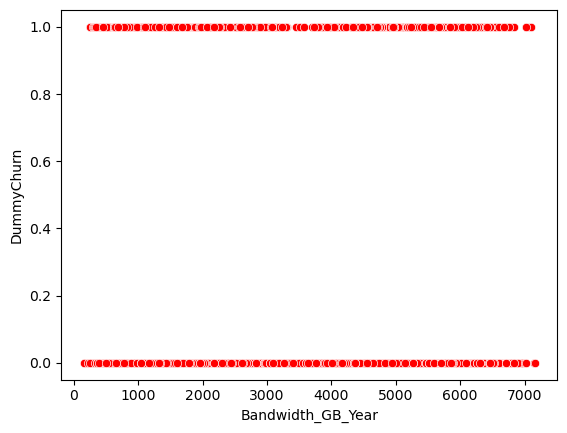

In [32]:
sns.scatterplot(x=df_churn['Bandwidth_GB_Year'], y=df_churn['DummyChurn'], color='red')
plt.show();

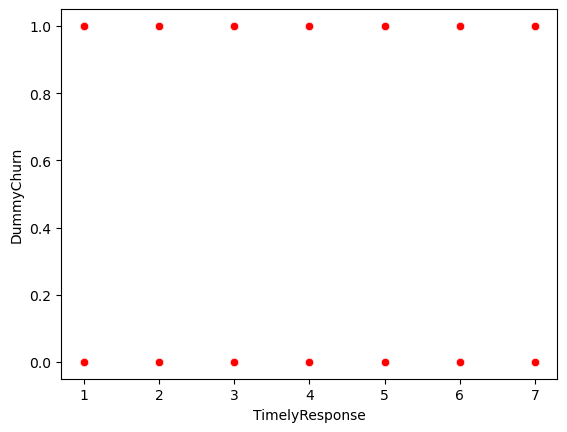

In [33]:
sns.scatterplot(x=df_churn['TimelyResponse'], y=df_churn['DummyChurn'], color='red')
plt.show();

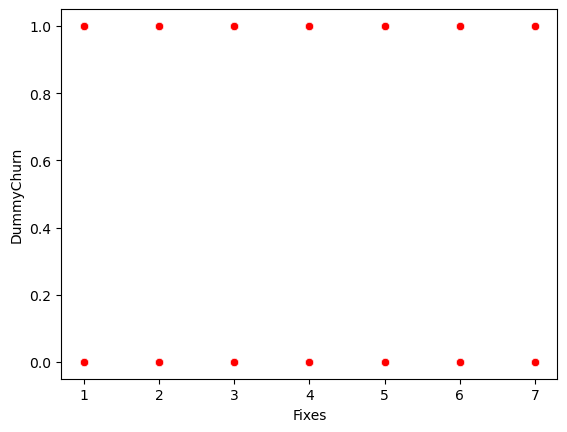

In [34]:
sns.scatterplot(x=df_churn['Fixes'], y=df_churn['DummyChurn'], color='red')
plt.show();

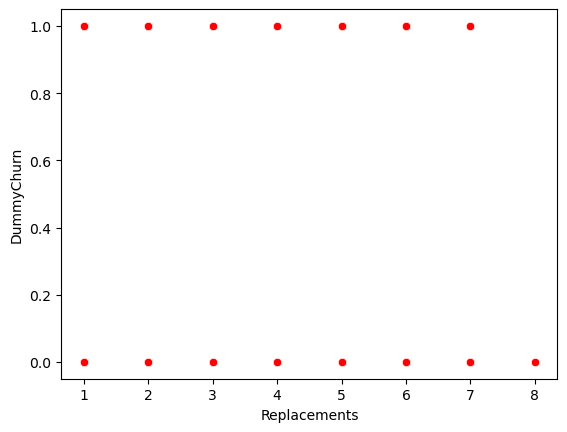

In [35]:
sns.scatterplot(x=df_churn['Replacements'], y=df_churn['DummyChurn'], color='red')
plt.show();

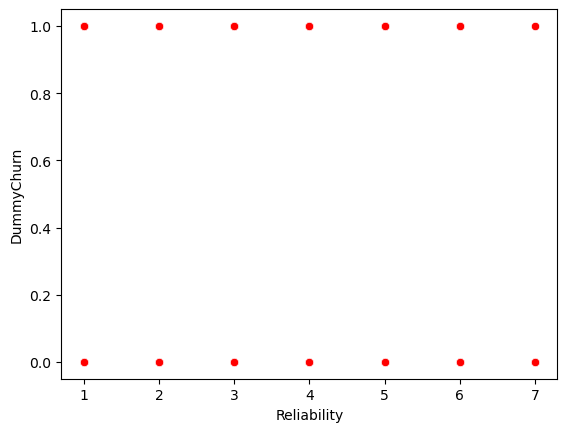

In [36]:
sns.scatterplot(x=df_churn['Reliability'], y=df_churn['DummyChurn'], color='red')
plt.show();

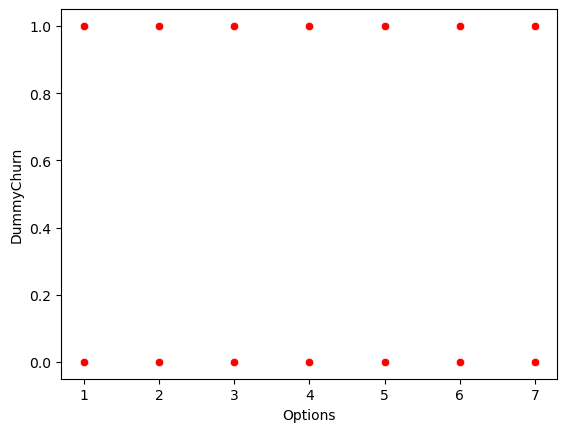

In [37]:
sns.scatterplot(x=df_churn['Options'], y=df_churn['DummyChurn'], color='red')
plt.show();

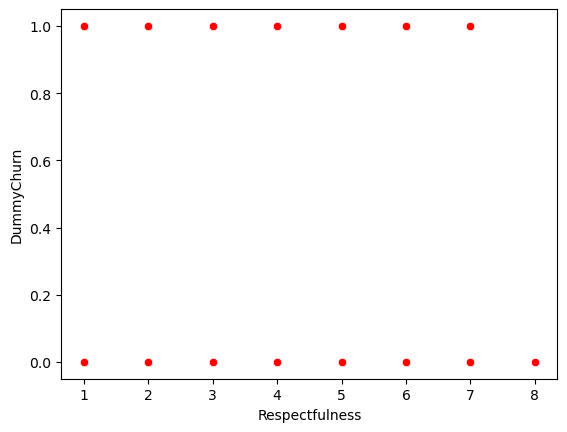

In [38]:
sns.scatterplot(x=df_churn['Respectfulness'], y=df_churn['DummyChurn'], color='red')
plt.show();

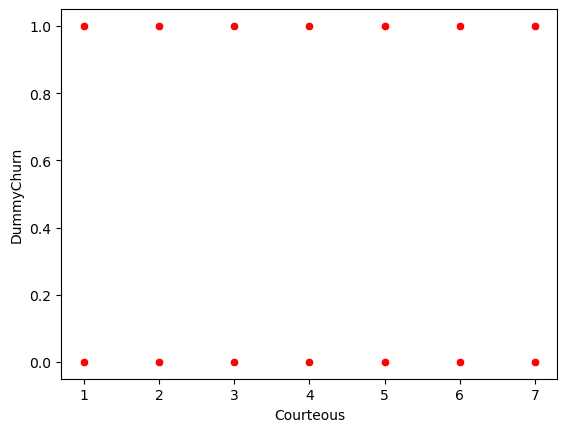

In [39]:
sns.scatterplot(x=df_churn['Courteous'], y=df_churn['DummyChurn'], color='red')
plt.show();

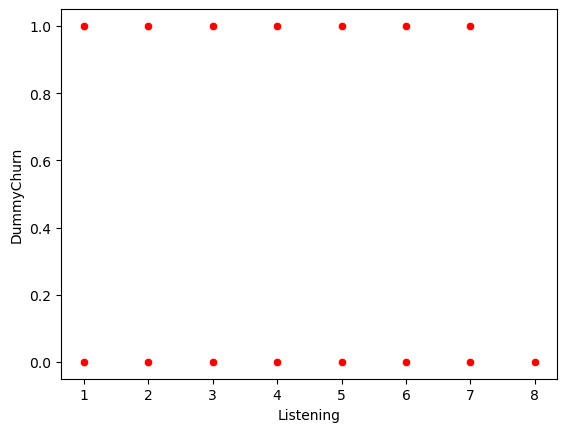

In [40]:
sns.scatterplot(x=df_churn['Listening'], y=df_churn['DummyChurn'], color='red')
plt.show();

From the above scatterplot, it shows that there is no correlation between the “DummyChurn” and any other continuous variables or categorical variables.

### C5. Prepared Dataset:

In [41]:
#Save prepared dataset as new files.
df_churn.to_csv('log_prepared_churn.csv')

In [42]:
# load the dataset
df = pd.read_csv('log_prepared_churn.csv')

In [43]:
# Display the dimension of dataframe
df.shape

(10000, 34)

In [44]:
#list the columns
df.columns

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyChurn', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling'],
      dtype='object')

## Part IV: Model Comparison and Analysis

### D1. Initial Model:

In [45]:
# Construct an logistic regression model from all predictors that were identified in Part C2
df['intercept'] = 1
churn_logit = sm.Logit(df['DummyChurn'], df[['intercept','Children','Age','Income','Outage_sec_perweek',
                                                               'Email','Contacts','Yearly_equip_failure','Tenure',
                                                               'MonthlyCharge','Bandwidth_GB_Year','TimelyResponse', 'Fixes',
                                                               'Replacements','Reliability','Options','Respectfulness',
                                                               'Courteous','Listening']])
results = churn_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.319573
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                  0.4473
Time:                        10:26:29   Log-Likelihood:                -3195.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -5.4290      0.369    -14.709      0.000      -6.152      -4.706
Children                -0.0980      0.016     -6.318      0.000      -0.128      -0.068
Age                      0.0114      0.002      7.130      0.000       0.008       0.015
Income                5.015e-07   1.12e-06      0.450      0.653   -1.68e-06    2.69e-06
Outage_sec_perweek      -0.0009      0.011     -0.087      0.931      -0.022       0.020
Email                    0.0018      0.010      0.169      0.866      -0.019       0.022
Contacts                 0.0243      0.032      0.764      0.445      -0.038       0.087
Yearly_equip_failure    -0.0267      0.050     -0.539      0.590      -0.124       0.071
Tenure                  -0.3156      0.012    -25.482      0.000      -0.340      -0.291
MonthlyCharge            0.0262      0.001     27.344      0.000       0.024       0.028
Bandwidth_GB_Year        0.0029      0.000     20.156      0.000       0.003       0.003
TimelyResponse          -0.0201      0.045     -0.447      0.655      -0.108       0.068
Fixes                   -0.0162      0.042     -0.384      0.701      -0.099       0.067
Replacements            -0.0053      0.039     -0.138      0.890      -0.081       0.070
Reliability             -0.0376      0.034     -1.096      0.273      -0.105       0.030
Options                 -0.0439      0.036     -1.223      0.221      -0.114       0.026
Respectfulness          -0.0044      0.037     -0.119      0.906      -0.076       0.068
Courteous               -0.0203      0.035     -0.580      0.562      -0.089       0.048
Listening               -0.0024      0.033     -0.071      0.943      -0.067       0.062
========================================================================================
"""

In [46]:
#Model including all dummy variables
df['intercept'] = 1
dummy_logit = sm.Logit(df['DummyChurn'], df[['intercept','Children','Age','Income','Outage_sec_perweek','Email','Contacts',
                                             'Yearly_equip_failure','DummyTechie','DummyContract','DummyPort_modem',
                                             'DummyTablet','DummyInternetService', 'DummyPhone','DummyMultiple',
                                             'DummyOnlineSecurity','DummyOnlineBackup', 'DummyDeviceProtection',
                                             'DummyTechSupport', 'DummyStreamingTV','DummyPaperlessBilling','Tenure',
                                             'MonthlyCharge', 'Bandwidth_GB_Year','TimelyResponse', 'Fixes','Replacements',
                                             'Reliability','Options','Respectfulness','Courteous','Listening']])
results1 = dummy_logit.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.271990
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9968
Method:                           MLE   Df Model:                           31
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                  0.5296
Time:                        10:26:29   Log-Likelihood:                -2719.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -5.8583      0.425    -13.793      0.000      -6.691      -5.026
Children                 -0.0395      0.018     -2.232      0.026      -0.074      -0.005
Age                       0.0069      0.002      3.659      0.000       0.003       0.011
Income                 1.199e-07   1.22e-06      0.099      0.921   -2.26e-06     2.5e-06
Outage_sec_perweek        0.0020      0.011      0.176      0.860      -0.021       0.025
Email                    -0.0015      0.011     -0.133      0.894      -0.024       0.021
Contacts                  0.0301      0.035      0.871      0.384      -0.038       0.098
Yearly_equip_failure     -0.0308      0.054     -0.570      0.569      -0.137       0.075
DummyTechie               0.7956      0.089      8.960      0.000       0.622       0.970
DummyContract            -2.2950      0.104    -22.135      0.000      -2.498      -2.092
DummyPort_modem           0.1610      0.068      2.353      0.019       0.027       0.295
DummyTablet              -0.0796      0.074     -1.071      0.284      -0.225       0.066
DummyInternetService     -1.4252      0.126    -11.314      0.000      -1.672      -1.178
DummyPhone               -0.3157      0.117     -2.707      0.007      -0.544      -0.087
DummyMultiple            -0.2908      0.080     -3.646      0.000      -0.447      -0.134
DummyOnlineSecurity      -0.3280      0.074     -4.452      0.000      -0.472      -0.184
DummyOnlineBackup        -0.5125      0.074     -6.931      0.000      -0.657      -0.368
DummyDeviceProtection    -0.4100      0.071     -5.764      0.000      -0.549      -0.271
DummyTechSupport         -0.3461      0.073     -4.717      0.000      -0.490      -0.202
DummyStreamingTV          0.0311      0.083      0.374      0.708      -0.132       0.194
DummyPaperlessBilling     0.1126      0.070      1.618      0.106      -0.024       0.249
Tenure                   -0.2043      0.021     -9.693      0.000      -0.246      -0.163
MonthlyCharge             0.0461      0.002     24.371      0.000       0.042       0.050
Bandwidth_GB_Year         0.0013      0.000      5.215      0.000       0.001       0.002
TimelyResponse           -0.0167      0.049     -0.342      0.732      -0.112       0.079
Fixes                     0.0143      0.046      0.311      0.755      -0.076       0.104
Replacements             -0.0158      0.042     -0.377      0.706      -0.098       0.066
Reliability              -0.0250      0.037     -0.673      0.501      -0.098       0.048
Options                  -0.0341      0.039     -0.877      0.380      -0.110       0.042
Respectfulness           -0.0309      0.040     -0.776      0.438      -0.109       0.047
Courteous                 0.0047      0.038      0.124      0.901      -0.070       0.079
Listening                -0.0090      0.036     -0.251      0.802      -0.079       0.061
=========================================================================================
"

#### Initial Multiple Linear Regression Model 

With 31 independent variables (18 continuous & 13 categorical): y = -5.8583 - 0.0395 * Children + 0.0069 * Age + 1.199e-07 * Income - 0.0020 * Outage_sec_perweek - 0.0015 * Email + 0.0301 * Contacts - 0.0308 * Yearly_equip_failure + 0.7956 * DummyTechie - 2.295 * DummyContract + 0.161 * DummyPort_modem - 0.0796 * DummyTablet - 1.4252 * DummyInternetService - 0.3157 *
DummyPhone - 0.2908 * DummyMultiple - 0.3280 * DummyOnlineSecurity - 0.5125* DummyOnlineBackup - 0.41 * DummyDeviceProtection - 0.3461 * DummyTechSupport + 0.0311 * DummyStreamingTV + 0.1126 * DummyPaperlessBilling - 0.2043 * Tenure + 0.0461 * MonthlyCharge + 0.0013 * Bandwidth_GB_Year - 0.0167 * TimelyResponse + 0.0143 * Fixes - 0.0158 * Replacements - 0.025 * Reliability - 0.0341 * Options - 0.0309 * Respectfulness + 0.0047 * Courteous - 0.009 * Listening

### D2. Justification of Model Reduction:

After running logistics regression model including all the dummy variables, it shows that the R value = 0.5296 which is not good for the variance of the model. Now i will run the logistic regression model with the p-value 0.05 or less as it is statistically significant. 

So the reduced model includes independent continuous variables:

• Children, Age, Tenure, MonthlyCharge, Bandwidth_GB_Year

Independent categorical variables:

• DummyTechie, DummyContract, DummyPort_modem, DummyInternetService, DummyPhone, DummyMultiple, DummyOnlineSecurity, DummyOnlineBackup, DummyDeviceProtection, DummyTechSupport

And dependent variable: DummyChurn

### D3. Reduced Logistic Regression Model:

In [47]:
# Create reduced logistic regression model
df['intercept'] = 1
churn_logit_reduced = sm.Logit(df['DummyChurn'], df[['intercept','Children', 'Age','DummyTechie', 'DummyContract', 'DummyPort_modem',
                                                     'DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
                                                     'DummyOnlineBackup', 'DummyDeviceProtection','DummyTechSupport', 'Tenure',
                                                     'MonthlyCharge', 'Bandwidth_GB_Year']])
results_reduced = churn_logit_reduced.fit()
results_reduced.summary()

Optimization terminated successfully.
         Current function value: 0.272362
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             DummyChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                  0.5290
Time:                        10:26:29   Log-Likelihood:                -2723.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -6.1973      0.236    -26.280      0.000      -6.659      -5.735
Children                 -0.0391      0.018     -2.221      0.026      -0.074      -0.005
Age                       0.0070      0.002      3.735      0.000       0.003       0.011
DummyTechie               0.7970      0.089      8.996      0.000       0.623       0.971
DummyContract            -2.2895      0.103    -22.136      0.000      -2.492      -2.087
DummyPort_modem           0.1598      0.068      2.339      0.019       0.026       0.294
DummyInternetService     -1.4240      0.125    -11.359      0.000      -1.670      -1.178
DummyPhone               -0.3193      0.116     -2.749      0.006      -0.547      -0.092
DummyMultiple            -0.2964      0.077     -3.857      0.000      -0.447      -0.146
DummyOnlineSecurity      -0.3303      0.073     -4.497      0.000      -0.474      -0.186
DummyOnlineBackup        -0.5146      0.072     -7.125      0.000      -0.656      -0.373
DummyDeviceProtection    -0.4075      0.070     -5.790      0.000      -0.545      -0.270
DummyTechSupport         -0.3555      0.073     -4.892      0.000      -0.498      -0.213
Tenure                   -0.2049      0.021     -9.770      0.000      -0.246      -0.164
MonthlyCharge             0.0463      0.002     25.620      0.000       0.043       0.050
Bandwidth_GB_Year         0.0013      0.000      5.279      0.000       0.001       0.002
=========================================================================================
"""

#### Reduced Logistic Regression Model:

With 15 independent variables (5 continuous & 10 categorical):

y = -6.1973 - 0.0391 * Children + 0.0070 * Age + 0.7970 * DummyTechie - 2.2895 * DummyContract + 0.1598 * DummyPort_modem - 1.4240 * DummyInternetService - 0.3193 * DummyPhone - 0.2964 * DummyMultiple - 0.3303 * DummyOnlineSecurity - 0.5146 * DummyOnlineBackup - 0.4075 * DummyDeviceProtection - 0.3555 * DummyTechSupport - 0.2049 * Tenure + 0.0463 * MonthlyCharge + 0.0013 * Bandwidth_GB_Year

### E1. Model Comparison:

- The logic of the variable selection technique

After running logistics regression model including all the dummy variables, it shows that the R value = 0.5296 which is not good for the variance of the model. So I took the variables with the p-value 0.05 or less as it is statistically significant to run the losgistic regression model. 
 
- Evaluation Metrics:

After removing the variables with p-value greater than 0.05, the pseudo R value is still 0.5290 which is basically same between the two models. So our reduced model based on p-values did not increase our R-squared so therefore the goodness of fit is same between the two models.


### Confusion Matrix

In [48]:
# Import the prepared dataset
matrix_df = pd.read_csv('log_prepared_churn.csv')
X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [49]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
# Predict the Test set results
y_pred = classifier.predict(X_test)

In [52]:
# Display the Confusion Matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[   0  831]
 [   0 1169]]


<AxesSubplot:>

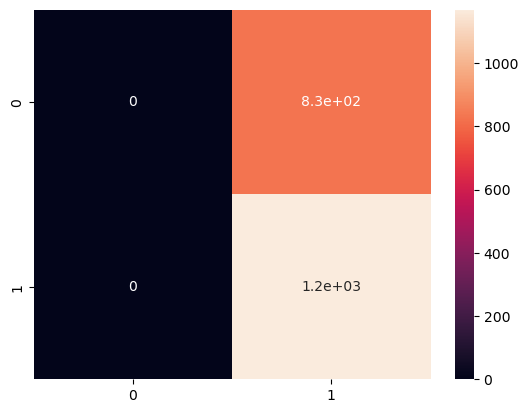

In [53]:
y_predict_test = classifier.predict(X_test)
matrix_new = confusion_matrix(y_test, y_predict_test)
sns.heatmap(matrix_new, annot=True)

### Classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       831
           1       0.58      1.00      0.74      1169

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.34      0.58      0.43      2000



### E2. Output and Calculations:
Output and calculation above.

### E3. Code:
All code for analysis are above.

## Part V: Data Summary and Implications

### F1. Results:
- The final regression equation for reduced model:

y = -6.1973 - 0.0391 * Children + 0.0070 * Age + 0.7970 * DummyTechie - 2.2895 * DummyContract + 0.1598 * DummyPort_modem - 1.4240 * DummyInternetService - 0.3193 * DummyPhone - 0.2964 * DummyMultiple - 0.3303 * DummyOnlineSecurity - 0.5146 * DummyOnlineBackup - 0.4075 * DummyDeviceProtection - 0.3555 * DummyTechSupport - 0.2049 * Tenure + 0.0463 * MonthlyCharge + 0.0013 * Bandwidth_GB_Year

- An interpretation of coefficients of the statistically significant variables of the model

    - Children- For one unit increase in children, the changes log odds of DummyChurn decrease by 0.0391 units, keeping all other independent variables constant.
    - Age - For one unit increase in Age, the changes log odds of DummyChurn will increase by 0.0070 units, keeping all other independent variables constant.
    - DummyTechie – For one unit increase in DummyTechie, the changes log odds of DummyChurn will increase 0.7970 units, keeping all other independent variables constant.
    - DummyContract – For one unit increase in DummyContract, the changes log odds of DummyChurn will decrease 2.2895 units, keeping all other independent variables constant.
    - DummyPort_modem - For one unit increase in DummyPort_modem, the changes log odds of DummyChurn will increase 0.1598 units, keeping all other independent variables constant.
    - DummyInternerService – For one unit increase in DummyInternerService, the changes log odds of DummyChurn will decrease by 1.4240 units, Keeping all other independent variables constant.
    - DummyPhone - For one unit increase in DummyPhone, the changes log odds of DummyChurn will decrease by 0.3193 units, Keeping all other independent variables constant.
    - DummyMultiple - For one unit increase in DummyMultiple, the changes log odds of DummyChurn will decrease by 0.2964 units, Keeping all other independent variables constant.
    - DummyOnlineSecurity - For one unit increase in DummyOnlineSecurity, the changes log odds of DummyChurn will decrease by 0.3303 units, Keeping all other independent variables constant.
    - DummyOnlineBackup - For one unit increase in DummyOnlineBackup, the changes log odds of DummyChurn will decrease by 0.5146 units, Keeping all other independent variables constant.
    - DummyDeviceProtection - For one unit increase in DummyDeviceProtection, the changes log odds ofDummyChurn will decrease by 0.4075 units, Keeping all other independent variables constant.
    - DummyTechSupport - For one unit increase in DummyTechSupport, the changes log odds of DummyChurn will decrease by 0.3555 units, Keeping all other independent variables constant.
    - Tenure - For one unit increase in Tenure, the changes log odds of DummyChurn will decrease 0.2049 units, Keeping all other independent variables constant.
    - MonthlyCharge - For one unit increase in MonthlyCharge, the changes log odds of DummyChurn will increase 0.4063 units, Keeping all other independent variables constant.
    - Bandwidth_GB_Year - For one unit increase in Bandwidth_GB_Year, the changes log odds of DummyChurn will increase 0.0013 units, Keeping all other independent variables constant.

- The statistical and practical significance of the model:
The p-values for all variables are statistically significant at 0.00, while the p-value for DummyPhones, DummyPort_modem and children in 0.006, 0.019 and 0.026 respectively. The model is practically significant because the p-values for all variables are
below 0.05.

- The limitations of the analysis:
The limitations of this analysis are that the data set is a bit small and more past data is need to provide clear understanding.  More investigation is required.



###  Sources for Third-Party Code:

GeeksForGeeks. ( Jan, 2023). ML | Logistic Regression using Python
https://www.geeksforgeeks.org/ml-logistic-regression-using-python/


### Sources:

GeeksForGeeks. ( Jan, 2023). Understanding Logistic Regression
https://www.geeksforgeeks.org/understanding-logistic-regression/

Zach. (Oct, 2020). How to Perform Logistic Regression in Python (Step-by-Step)
https://www.statology.org/logistic-regression-python/

Zach.(October, 2020). The 6 Assumptions of Logistic Regression. https://www.statology.org/assumptions-of-logistic-regression/
